#### OOD GANS Walkthrough

In [1]:
import sys
sys.path.insert(0, '../')

In [2]:
from config import *
from dataset import MNIST, CIFAR10
from models.mnist_cnn import MNISTCNN
from models.gans import *
from models.dc_gan_model import *
# from trainer import train # Not needed for OOD GANS

# import autoreload code
%load_ext autoreload
%autoreload 2

[KeOps] Warning : Cuda libraries were not detected on the system ; using cpu only mode


### Dataset Processing


In [3]:
mnist_tri_set, mnist_val_set, mnist_tri_loader, mnist_val_loader = MNIST(128, 32, 2, True)
cifar_tri_set, cifar_val_set , cifar_tri_loader, cifar_val_loader = CIFAR10(128, 32)
# TODO: Show dataset statistics and sample images.

Files already downloaded and verified
Files already downloaded and verified


### Original GANS Implementation

Iter: 0, D: 1.427, G:0.7259


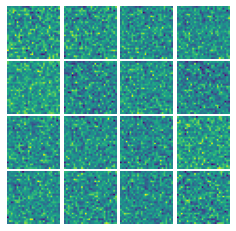


Iter: 250, D: 0.9467, G:0.9904


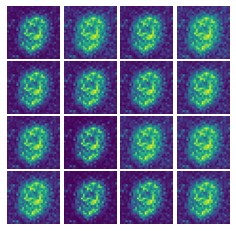


Iter: 500, D: 1.222, G:1.023


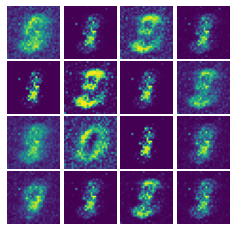


Iter: 750, D: 2.098, G:0.9385


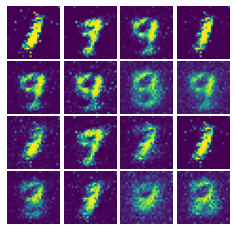


Iter: 1000, D: 1.221, G:0.7965


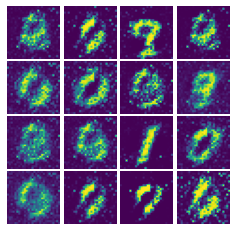


Iter: 1250, D: 1.322, G:1.048


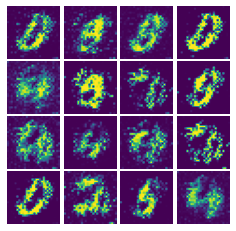


Iter: 1500, D: 1.255, G:0.9222


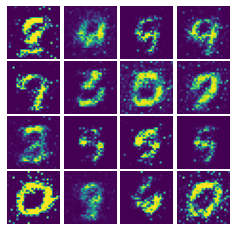


Iter: 1750, D: 1.303, G:0.8713


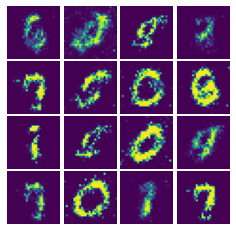


Iter: 2000, D: 1.304, G:0.8039


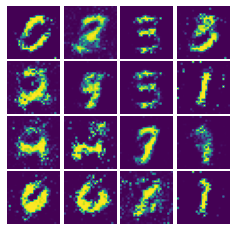


Iter: 2250, D: 1.458, G:0.7874


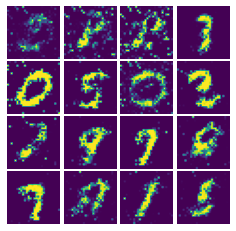


Iter: 2500, D: 1.507, G:1.074


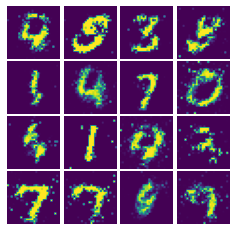


Iter: 2750, D: 1.258, G:0.9905


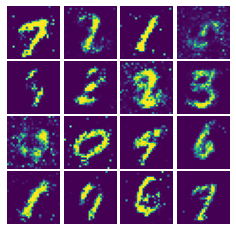


Iter: 3000, D: 1.305, G:0.817


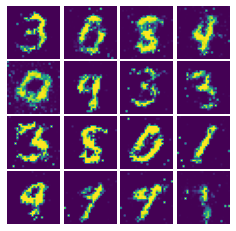


Iter: 3250, D: 1.289, G:0.8623


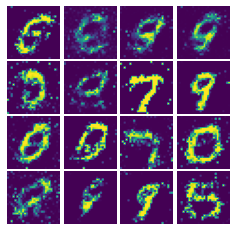


Iter: 3500, D: 1.322, G:0.8667


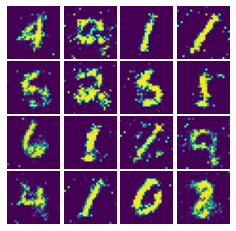


Iter: 3750, D: 1.293, G:0.8563


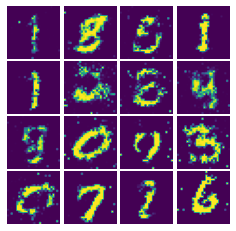


Iter: 4000, D: 1.336, G:0.754


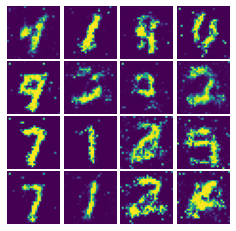


Iter: 4250, D: 1.341, G:0.7559


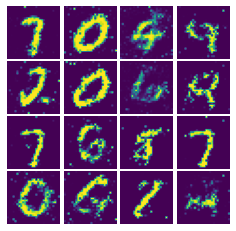


Iter: 4500, D: 1.294, G:0.8083


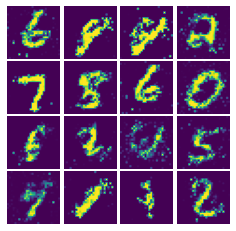

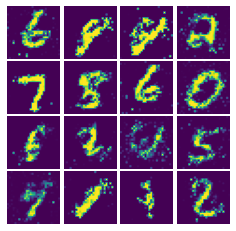

In [39]:
D = discriminator(gan_type=GAN_TYPE.NAIVE).to(DEVICE)
G = generator().to(DEVICE)
D_solver = get_optimizer(D)
G_solver = get_optimizer(G)
gan_trainer(mnist_tri_loader, D, G, D_solver, G_solver,
            discriminator_loss, generator_loss, gan_type=GAN_TYPE.NAIVE)

### Original Deep Convolutional GAN Implementation

In [ ]:
D = dc_discriminator().to(DEVICE)
G = dc_generator().to(DEVICE)
D_solver = get_optimizer(D)
G_solver = get_optimizer(G)
gan_trainer(mnist_tri_loader, D, G, D_solver, G_solver,
            discriminator_loss, generator_loss, gan_type=GAN_TYPE.NAIVE)

### OOD GAN Implementation



Files already downloaded and verified
Files already downloaded and verified


ic| zsl_ood: tensor(-0.7512)
ic| zsl_fake: tensor(-0.7448)
ic| ind_ce_loss: tensor(2.2974, grad_fn=<NllLossBackward0>)
ic| -zsl_fake: tensor(0.7440)
ic| -dist_fake_ind: tensor(0.0289, grad_fn=<NegBackward0>)
ic| dist_fake_ood: tensor(0.0250, grad_fn=<SelectBackward0>)


Iter: 0, D: 0.8014, G:0.7979


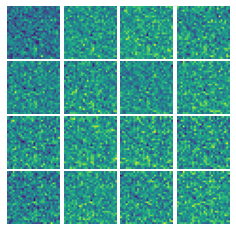

ic| zsl_ood: tensor(-0.7560)
ic| zsl_fake: tensor(-0.7471)
ic| ind_ce_loss: tensor(2.2355, grad_fn=<NllLossBackward0>)
ic| -zsl_fake: tensor(0.7470)
ic| -dist_fake_ind: tensor(-0.4109, grad_fn=<NegBackward0>)
ic| dist_fake_ood: tensor(-0.5410, grad_fn=<SelectBackward0>)
ic| zsl_ood: tensor(-0.7647)
ic| zsl_fake: tensor(-0.7484)
ic| ind_ce_loss: tensor(2.1689, grad_fn=<NllLossBackward0>)
ic| -zsl_fake: tensor(0.7493)
ic| -dist_fake_ind: tensor(-0.2157, grad_fn=<NegBackward0>)
ic| dist_fake_ood: tensor(-0.7245, grad_fn=<SelectBackward0>)
ic| zsl_ood: tensor(-0.7658)
ic| zsl_fake: tensor(-0.7514)
ic| ind_ce_loss: tensor(2.1218, grad_fn=<NllLossBackward0>)
ic| -zsl_fake: tensor(0.7550)
ic| -dist_fake_ind: tensor(-0.5070, grad_fn=<NegBackward0>)
ic| dist_fake_ood: tensor(-0.8195, grad_fn=<SelectBackward0>)
ic| zsl_ood: tensor(-0.7647)
ic| zsl_fake: tensor(-0.7581)
ic| ind_ce_loss: tensor(2.0561, grad_fn=<NllLossBackward0>)
ic| -zsl_fake: tensor(0.7575)
ic| -dist_fake_ind: tensor(-0.1016, gr

KeyboardInterrupt: 

In [4]:
# TODO: Launch this on Google Colab
D = discriminator(gan_type=GAN_TYPE.OOD).to(DEVICE)
G = generator().to(DEVICE)
D_solver = get_optimizer(D)
G_solver = get_optimizer(G)
gan_trainer(mnist_tri_loader, D, G, D_solver, G_solver,
            discriminator_loss, generator_loss,
            gan_type=GAN_TYPE.OOD, ood_img_sample=CIFAR10)